In [139]:
import pandas as pd 
def load_df(path):
    return pd.read_csv(path)
df=load_df("Assignment 4 Dataset 1 (1205).csv")
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [140]:
df.shape

(249, 16)

In [141]:
null_values=df.isnull()
null_values

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [142]:
null_counts = df.isnull().sum()
null_counts
#Columns last_review & reviews_per_month has null counts(7)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 


## Filling the NULL VALUES

1. Converting last_review column to Date & Time Format

In [144]:
df['last_review']=pd.to_datetime(df['last_review'])
last_review_mean = df['last_review'].mean()

#filling the null values in last_review column with the mean of data
df['last_review'].fillna(last_review_mean, inplace=True)

2. Filling the Null Values by mean in Reviews pr month column

In [145]:
Revies_PM_Mean= df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(Revies_PM_Mean, inplace=True)
df['reviews_per_month'].isnull().sum()

0

3. Checking if any null values present in the dataframe

In [146]:
df.isnull().sum().sum()

0

## Data Visualisations

1. Distribution of Room Types


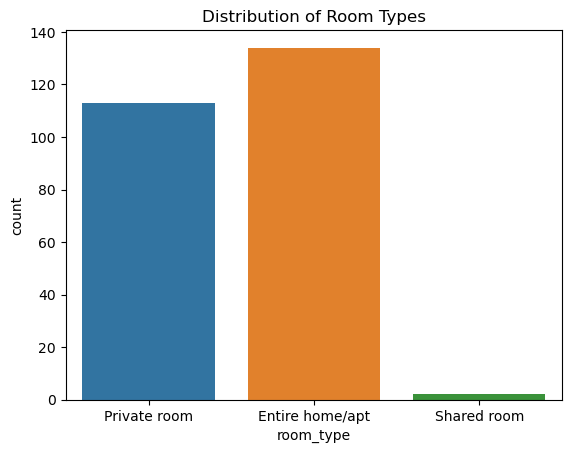

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='room_type', data=df)
plt.title('Distribution of Room Types')
plt.show()

## Doing the same visualisation using plotly

In [151]:
import plotly.express as px
room_type_counts = df['room_type'].value_counts()
fig=px.bar(df, x= room_type_counts.index, y=room_type_counts.values,
           title="Distribution_of_room_types", labels={ 'x' :'Room Type', 'y' : 'Count'},
           category_orders={'room_type':['Private room', 'Entire room/apt','Shared room']}, 
           color_discrete_sequence=['magenta'], 
           width=600, height=400 )
#hover information
fig.update_traces(hovertemplate='Room Type: %{x}<br>Count:%{y}' )
fig.show()

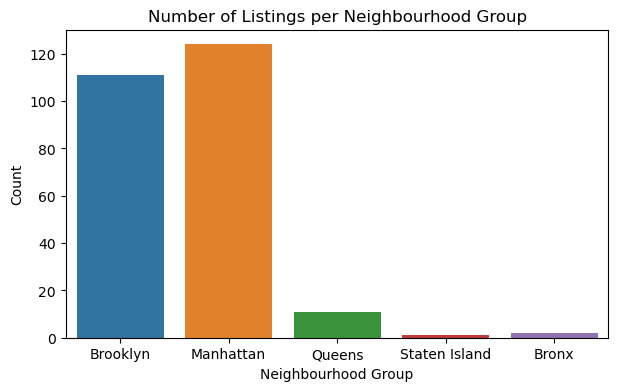

In [76]:
# Number of listings per neighbourhood group
plt.figure(figsize=(7, 4))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Number of Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

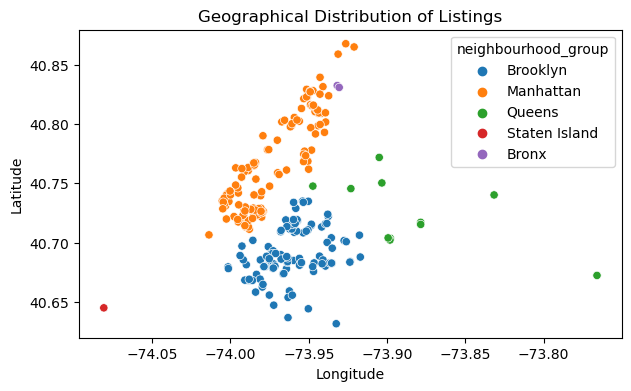

In [79]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)
plt.title('Geographical Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Introducing Hover over functionality using plotly

In [82]:

fig = px.scatter(df, x='longitude', y='latitude', color='neighbourhood_group', 
                 title='Geographical Distribution of Listings', 
                 labels={'longitude': 'Longitude', 'latitude': 'Latitude', 'neighbourhood_group': 'Neighbourhood Group'})

# Show the plot
fig.show()


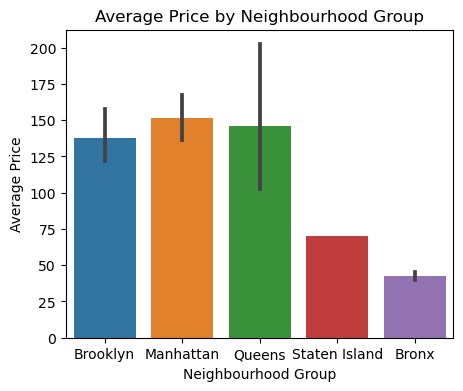

In [85]:
# Average price by neighbourhood group
plt.figure(figsize=(5, 4))
sns.barplot(x='neighbourhood_group', y='price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

In [86]:
import plotly.express as px

# Compute average price for each neighbourhood group
average_prices = df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Create an interactive bar plot with Plotly Express
fig = px.bar(average_prices, x='neighbourhood_group', y='price',
             title='Average Price by Neighbourhood Group',
             labels={'neighbourhood_group': 'Neighbourhood Group', 'price': 'Average Price'})

# Specify hover information
fig.update_traces(hovertemplate='Neighbourhood Group: %{x}<br>Average Price: %{y}')

# Show the plot
fig.show()

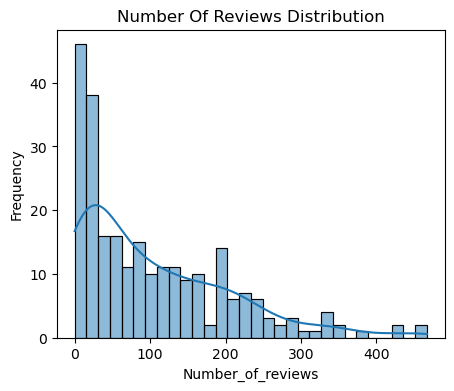

In [89]:
#No. of reviews distribution
plt.figure(figsize=(5,4))
sns.histplot( df['number_of_reviews'], bins=30,kde=True)
plt.title('Number Of Reviews Distribution')
plt.xlabel('Number_of_reviews')
plt.ylabel('Frequency')
plt.show()

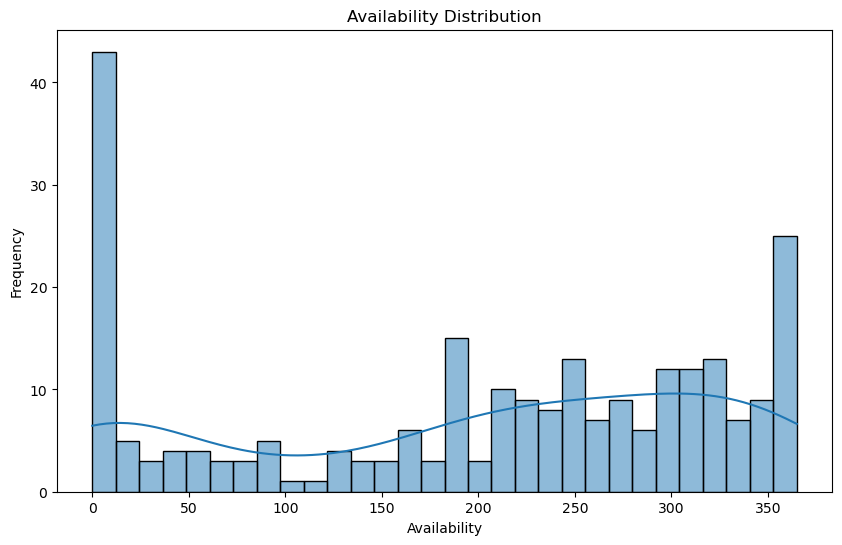

In [90]:
# Availability distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, kde=True)
plt.title('Availability Distribution')
plt.xlabel('Availability')
plt.ylabel('Frequency')
plt.show()

# Data Cleaning of the Second Data Set ( Employees Information )

In [94]:
import pandas as pd
def load_df(path):
    return pd.read_csv(path)
df=load_df("Assignment 4 Dataset 2 (1205).csv")
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [96]:
df.shape

(311, 36)

In [98]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

As we can see from above DateOfTermination has more than 50% values as null values we are going to drop that column

In [99]:
df.drop(columns='DateofTermination', inplace=True)

In [101]:
df.isnull().sum().sum()

8

In [110]:
df['ManagerID'].unique()

array([22.,  4., 20., 16., 39., 11., 10., 19., 12.,  7., 14., 18., nan,
        3.,  2.,  1., 17.,  5., 21.,  6., 15., 13.,  9., 30.])

In [112]:
df['ManagerName'].unique()

array(['Michael Albert', 'Simon Roup', 'Kissy Sullivan', 'Elijiah Gray',
       'Webster Butler', 'Amy Dunn', 'Alex Sweetwater', 'Ketsia Liebig',
       'Brannon Miller', 'Peter Monroe', 'David Stanley', 'Kelley Spirea',
       'Brandon R. LeBlanc', 'Janet King', 'John Smith',
       'Jennifer Zamora', 'Lynn Daneault', 'Eric Dougall',
       'Debra Houlihan', 'Brian Champaigne', 'Board of Directors'],
      dtype=object)

Finding the Manager names that is not assigned with any ManagerID

In [115]:

# Filter ManagerName values where ManagerID is missing
missing_manager_names = df.loc[df['ManagerID'].isnull(), 'ManagerName'].unique()

# Display the unique ManagerName values where ManagerID is missing
print(missing_manager_names)

['Webster Butler']


So from the above we landed on the observation that Webster Butler is not assigned bwith any manager ID 

In [119]:
manager_name='Webster Butler'
manager_id=8.0
df.loc[df['ManagerName']==manager_name,'ManagerID']=manager_id

In [121]:
df['ManagerID']=df['ManagerID'].astype(int)

Checking how many null values are still present in the data set:

In [124]:
df.isnull().sum().sum()

0

## Data Visualisation of Employees Data Set

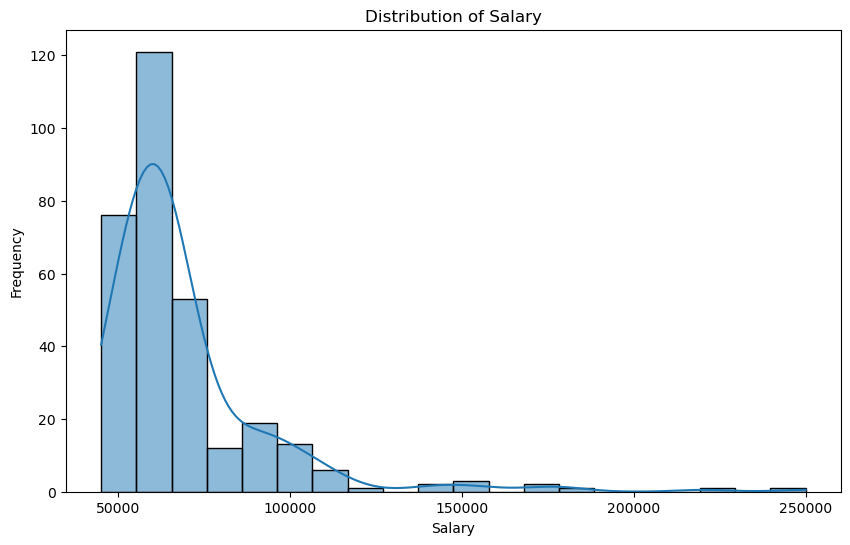

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


In [127]:
import plotly.express as px

# Create an interactive histogram with hover functionality
fig = px.histogram(df, x='Salary', nbins=20, title='Distribution of Salary',
                   labels={'Salary': 'Salary', 'count': 'Frequency'},
                   marginal='rug',
                   hover_name='Salary')

# Update layout
fig.update_layout(xaxis_title='Salary', yaxis_title='Frequency')

# Show the plot
fig.show()



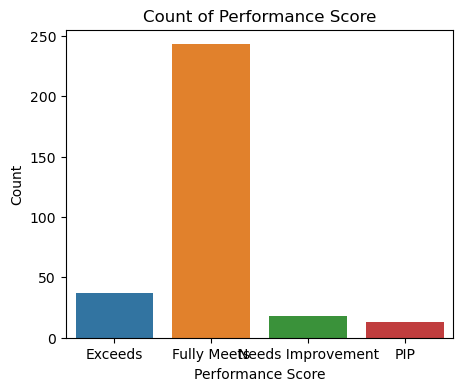

In [131]:
plt.figure(figsize=(5, 4))
sns.countplot(x='PerformanceScore', data=df)
plt.title('Count of Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()


In [132]:


# Calculate the count of each performance score
performance_count = df['PerformanceScore'].value_counts().reset_index()
performance_count.columns = ['PerformanceScore', 'Count']

# Create an interactive bar plot with hover functionality
fig = px.bar(performance_count, x='PerformanceScore', y='Count', 
             title='Count of Performance Score', 
             labels={'PerformanceScore': 'Performance Score', 'Count': 'Count'},
             color='PerformanceScore',
             hover_data={'Count': True})

# Update layout
fig.update_layout(xaxis_title='Performance Score', yaxis_title='Count')

# Show the plot
fig.show()


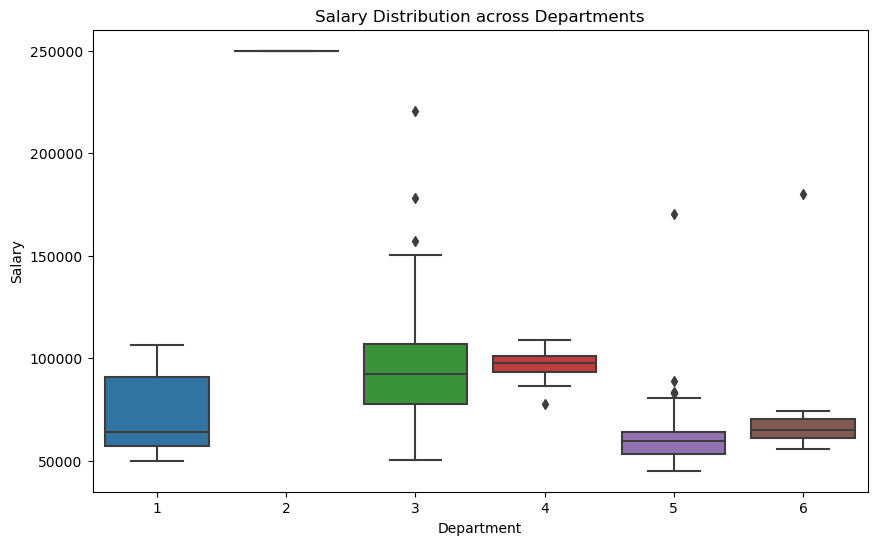

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DeptID', y='Salary', data=df)
plt.title('Salary Distribution across Departments')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12228\3737861028.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



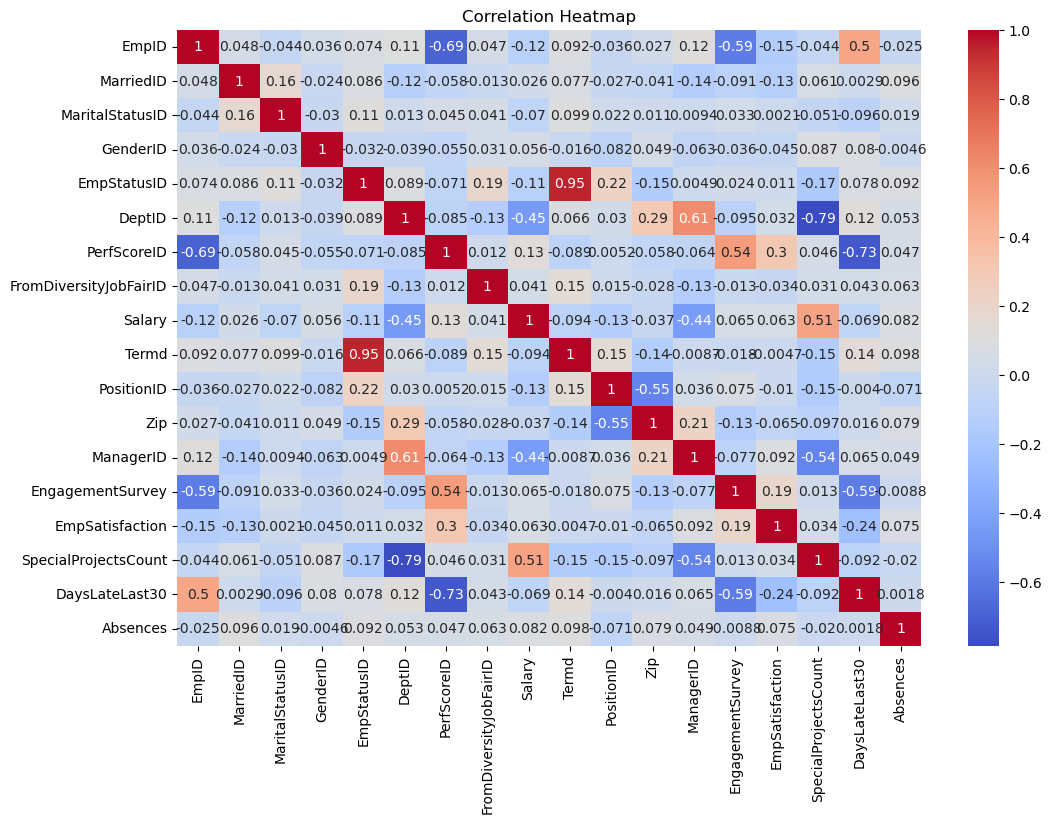

In [134]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
